## Download Data

In [1]:
! wget -O ecg.zip "https://nyu.box.com/shared/static/0o8c9bjoiclz3cussfhw95vm2w6iz6x0.zip"

--2021-03-06 13:33:30--  https://nyu.box.com/shared/static/0o8c9bjoiclz3cussfhw95vm2w6iz6x0.zip
Resolving nyu.box.com (nyu.box.com)... 107.152.27.197
Connecting to nyu.box.com (nyu.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/0o8c9bjoiclz3cussfhw95vm2w6iz6x0.zip [following]
--2021-03-06 13:33:30--  https://nyu.box.com/public/static/0o8c9bjoiclz3cussfhw95vm2w6iz6x0.zip
Reusing existing connection to nyu.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://nyu.app.box.com/public/static/0o8c9bjoiclz3cussfhw95vm2w6iz6x0.zip [following]
--2021-03-06 13:33:30--  https://nyu.app.box.com/public/static/0o8c9bjoiclz3cussfhw95vm2w6iz6x0.zip
Resolving nyu.app.box.com (nyu.app.box.com)... 107.152.27.201
Connecting to nyu.app.box.com (nyu.app.box.com)|107.152.27.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b

In [2]:
! unzip ecg.zip

Archive:  ecg.zip
   creating: ecg/
  inflating: __MACOSX/._ecg          
  inflating: ecg/ecg.mat             
  inflating: __MACOSX/ecg/._ecg.mat  
  inflating: ecg/s0010_re.dat        
  inflating: __MACOSX/ecg/._s0010_re.dat  
  inflating: ecg/data.csv            
  inflating: __MACOSX/ecg/._data.csv  


In [3]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")
#just doing this to supress annoying warning due to incompactibility 

In [5]:
fs = 500.
ecg_full = scipy.io.loadmat('ecg/ecg.mat')['ecg'][0:4096,0]
ecg = 5 * ecg_full[48:(-48)]
n = len(ecg)
time_samples = np.arange(n)/fs
ft = np.fft.fft(ecg)

## Visualizing ECG components

In [6]:
comp_f_val = [0,1,3,16]

Text(0.5, 0, 'Time (s)')

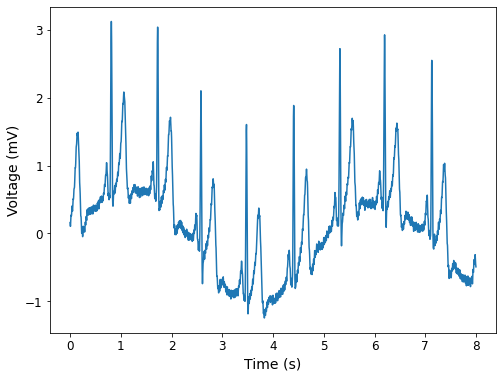

In [7]:
plt.figure(figsize=(8,6))
plt.plot(time_samples,ecg)
plt.ylabel('Voltage (mV)',fontsize=14)
plt.tick_params(labelsize=12)
plt.xlabel('Time (s)',fontsize=14)

Text(0.5, 0, 'Frequency (Hz)')

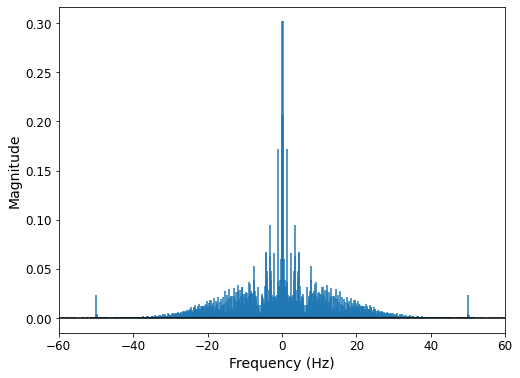

In [8]:
f_step = 1 / (n / fs)
f_inds = f_step * np.arange(-(n/2-1),n/2+1)
spectrum = np.fft.fftshift(ft)/n
# spectrum = np.concatenate((aux_spectrum[int(n/2+1):],aux_spectrum[:int(n/2+1)]))
plt.figure(figsize = (8,6))
markerline, stemlines, baseline = plt.stem(f_inds,np.abs(spectrum),markerfmt='None', use_line_collection = True)
plt.setp(baseline, color='k')
plt.xlim((-60,60))
plt.tick_params(labelsize=12)
plt.ylabel('Magnitude',fontsize=14)
plt.xlabel('Frequency (Hz)',fontsize=14)

Text(0.5, 0, 'Frequency (Hz)')

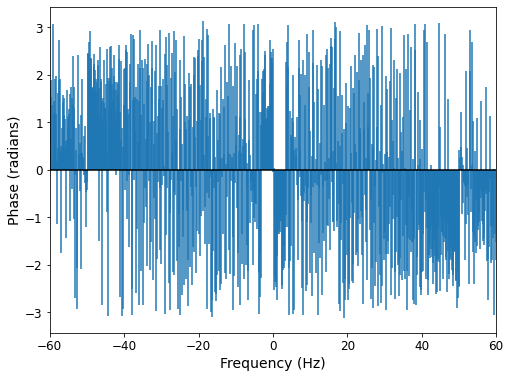

In [9]:
plt.figure(figsize = (8,6))
plt.xlim((-60,60))
markerline, stemlines, baseline = plt.stem(f_inds,np.angle(spectrum),markerfmt='None', use_line_collection = True)
plt.setp(baseline, color='k')
plt.tick_params(labelsize=12)
plt.ylabel('Phase (radians)',fontsize=14)
plt.xlabel('Frequency (Hz)',fontsize=14)

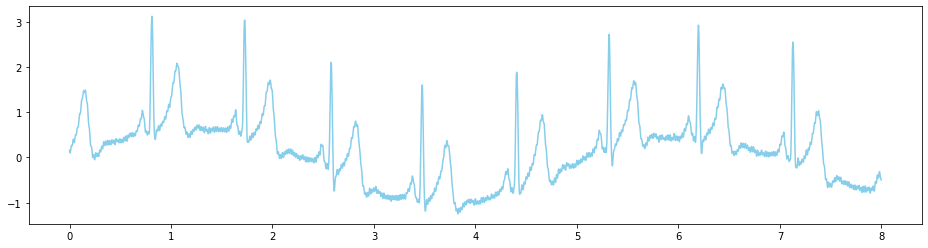

In [10]:
fig_size = (16,4)
plt.figure(figsize=fig_size)
plt.plot(time_samples,ecg,color='skyblue',label='Signal')

0
1
3
16


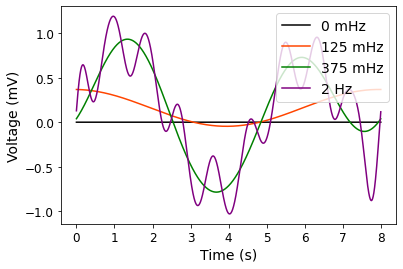

In [11]:
colors = ['black','orangered','green','purple','orange']

for ind,comp_f in enumerate(comp_f_val):

    print(str(comp_f))
    ft_lowpass = np.copy(ft)
    ft_lowpass[comp_f:(n-comp_f)] = 0
    ecg_lowpass = np.fft.ifft(ft_lowpass)
    mHz = int(1e3 * comp_f * fs / n)
    str_label = str(mHz) + ' mHz'
    if mHz > 999:
        Hz = int(comp_f * fs / n)
        str_label = str(Hz) + ' Hz'
    plt.plot(time_samples, np.real(ecg_lowpass), color=colors[ind],label = str_label)
    
plt.tick_params(labelsize=12)
plt.ylabel('Voltage (mV)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)
plt.legend(loc = 'upper right',fontsize=14)

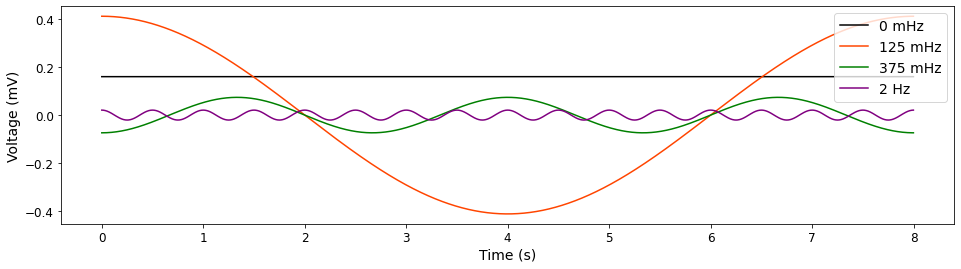

In [12]:
plt.figure(figsize=fig_size)
for ind,comp_f in enumerate(comp_f_val):

    ft_component = np.zeros(ft.shape)
    ft_component[comp_f] = ft[comp_f]
    if comp_f > 0:
        ft_component[n-comp_f] = ft[n-comp_f]
    component = np.fft.ifft(ft_component)
    mHz = int(1e3 * comp_f * fs / n)
    str_label = str(mHz) + ' mHz'
    if mHz > 999:
        Hz = int(comp_f * fs / n)
        str_label = str(Hz) + ' Hz'
    plt.plot(time_samples, np.real(component), color=colors[ind],label = str_label)
plt.tick_params(labelsize=12)
plt.ylabel('Voltage (mV)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)
plt.legend(loc = 'upper right',fontsize=14)

40
80
400


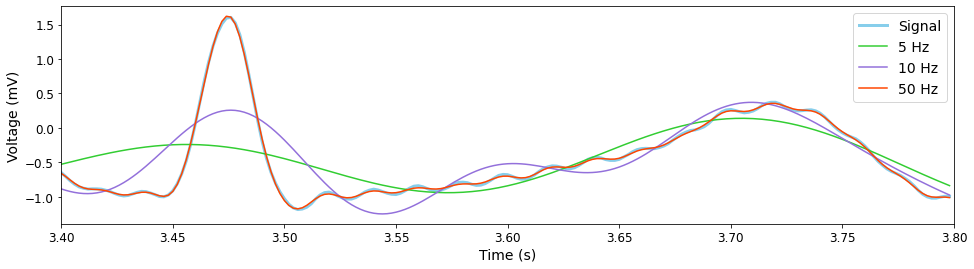

In [13]:
comp_f_val = [40,80,400]

ind_ini = 1700
ind_end = 1900

colors = ['limegreen','mediumpurple','orangered']

plt.figure(figsize=fig_size)
plt.plot(time_samples[ind_ini:ind_end],ecg[ind_ini:ind_end],linewidth=3,color='skyblue',label='Signal')
plt.xlim((time_samples[ind_ini],time_samples[ind_end]))
for ind,comp_f in enumerate(comp_f_val):

    print(str(comp_f))
    ft_lowpass = np.copy(ft)
    ft_lowpass[comp_f:(n-comp_f)] = 0
    ecg_lowpass = np.fft.ifft(ft_lowpass)
    Hz = int( comp_f * fs / n)
    plt.plot(time_samples[ind_ini:ind_end],ecg_lowpass[ind_ini:ind_end],color=colors[ind],label = str(Hz ) + ' Hz')
plt.tick_params(labelsize=12)
plt.ylabel('Voltage (mV)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)
plt.legend(loc = 'upper right',fontsize=14)

Text(0.5, 0, 'Time (s)')

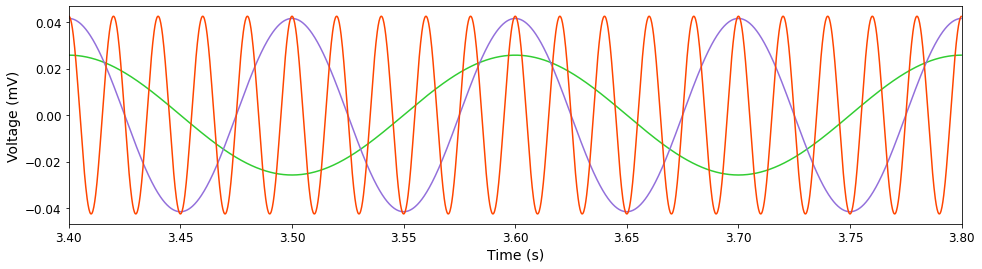

In [14]:
upsamp_factor = 10
n_upsamp = upsamp_factor * n
time_samples_upsamp = np.arange(0,n,1./upsamp_factor)/fs
ini_upsamp = ind_ini*upsamp_factor
end_upsamp = ind_end*upsamp_factor
plt.figure(figsize=fig_size)
plt.xlim((time_samples_upsamp[ini_upsamp],time_samples_upsamp[end_upsamp]))
for ind,comp_f in enumerate(comp_f_val):

    ft_component = np.zeros(ft.shape)
    ft_component[comp_f] = ft[comp_f]
    if comp_f > 0:
        ft_component[n-comp_f] = ft[n-comp_f]
    ft_component_upsamp = np.concatenate((ft_component[:int(n/2)],np.zeros(n_upsamp-n)))
    ft_component_upsamp = np.concatenate((ft_component_upsamp,ft_component[int(n/2):]))
    component = np.fft.ifft(ft_component_upsamp)*upsamp_factor
    Hz = int(comp_f * fs / n)
    plt.plot(time_samples_upsamp[ini_upsamp:end_upsamp],component[ini_upsamp:end_upsamp],color=colors[ind],label = str(Hz) + ' Hz')
plt.tick_params(labelsize=12)
plt.ylabel('Voltage (mV)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)

## ECG Filtering

In [15]:
fs = 500
ecg_full = scipy.io.loadmat('ecg/ecg.mat')['ecg'][0:4096,0]
ecg = 5 * ecg_full[48:(-48)]
n = len(ecg)
time_samples = np.arange(n)/fs

Text(0.5, 0, 'Time (s)')

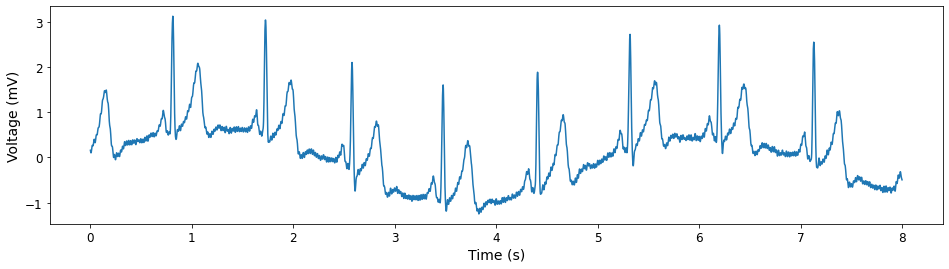

In [16]:
t = np.fft.fft(ecg)
plt.figure(figsize=fig_size)
plt.plot(time_samples,ecg)
plt.tick_params(labelsize=12)
plt.ylabel('Voltage (mV)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)

(-60.0, 60.0)

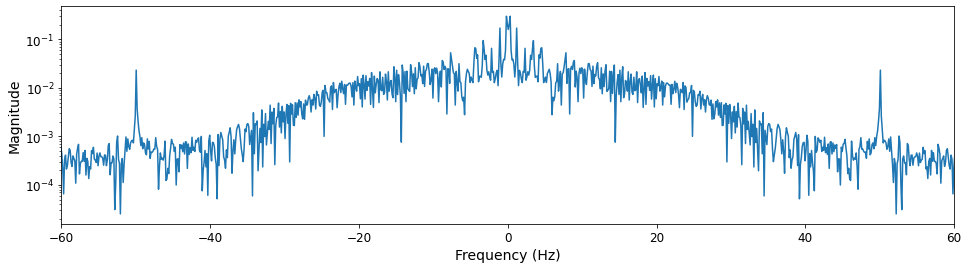

In [17]:
plt.figure(figsize=fig_size)
freq_samples = np.linspace(-fs/2,fs/2,n)# np.arange(-fs/2,fs/n,fs/2)
plt.plot(freq_samples,np.abs(np.fft.fftshift(ft))/n)
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.ylabel('Magnitude',fontsize=14)
plt.xlabel('Frequency (Hz)',fontsize=14)
plt.xlim((-60,60))

#### High Pass Filtering

(-60.0, 60.0)

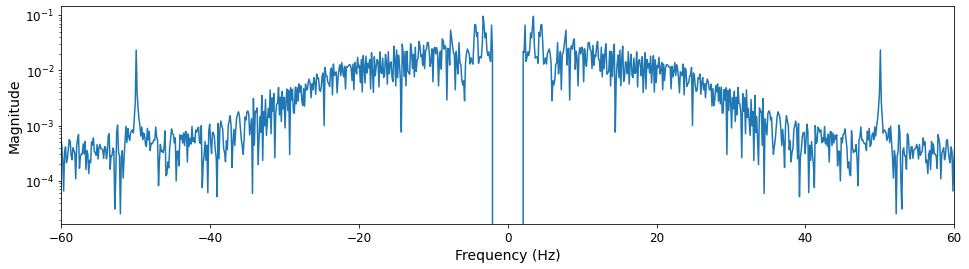

In [18]:
highpass_f = np.int(2 * n / fs )
ft_highpass = ft
ft_highpass[:highpass_f] = 0
ft_highpass[(n-highpass_f):] = 0 
ecg_highpass = np.fft.ifft(ft_highpass)
plt.figure(figsize=fig_size)
plt.plot(freq_samples,np.abs(np.fft.fftshift(ft_highpass))/n)
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.ylabel('Magnitude',fontsize=14)
plt.xlabel('Frequency (Hz)',fontsize=14)
plt.xlim((-60,60))

In time domain:

Text(0.5, 0, 'Time (s)')

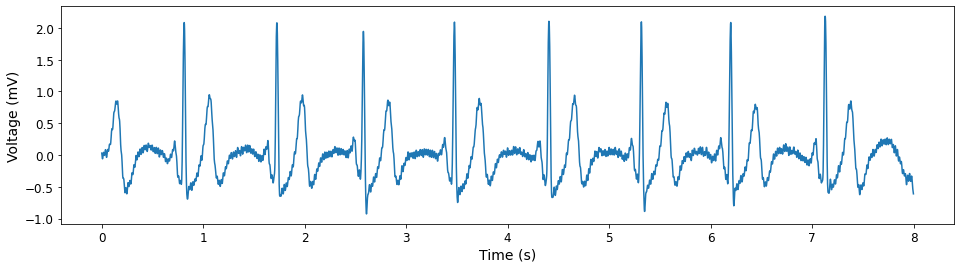

In [19]:
plt.figure(figsize=fig_size)
plt.plot(time_samples,ecg_highpass)
plt.tick_params(labelsize=12)
plt.ylabel('Voltage (mV)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)

Zooming in:

Text(0.5, 0, 'Time (s)')

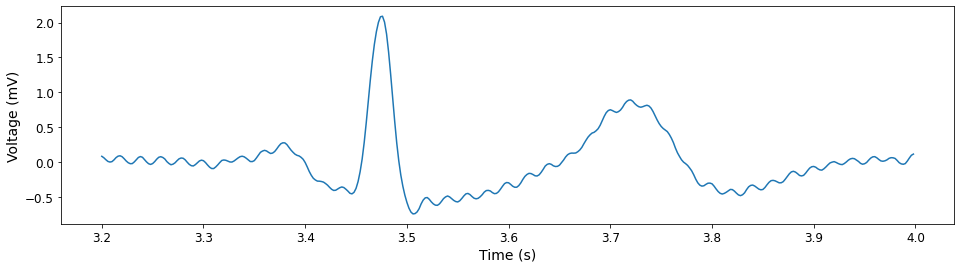

In [20]:
ind_ini = 1600
ind_end = 2000

plt.figure(figsize=fig_size)
plt.plot(time_samples[ind_ini:ind_end],ecg_highpass[ind_ini:ind_end])
plt.tick_params(labelsize=12)
plt.ylabel('Voltage (mV)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)

#### Bandpass Filtering

(-60.0, 60.0)

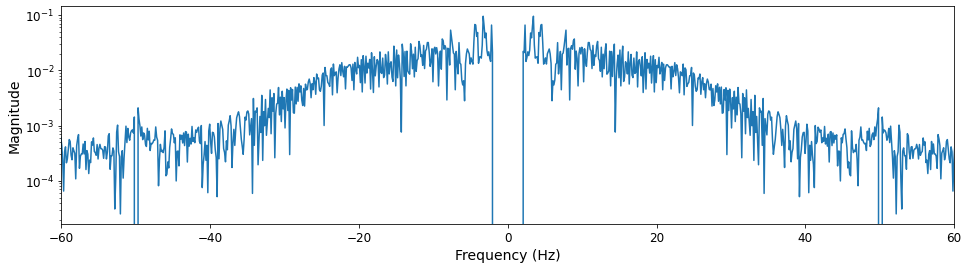

In [21]:
bandpass_f = np.int(50 * n / fs )
ft_filtered = ft_highpass
ft_filtered[(bandpass_f - 1):(bandpass_f + 2)] = 0
ft_filtered[(n -bandpass_f - 1):(n - bandpass_f + 2)] = 0
ecg_filtered = np.fft.ifft(ft_filtered)
plt.figure(figsize=fig_size)
plt.plot(freq_samples,np.abs(np.fft.fftshift(ft_filtered))/n)
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.ylabel('Magnitude',fontsize=14)
plt.xlabel('Frequency (Hz)',fontsize=14)
plt.xlim((-60,60))

Text(0.5, 0, 'Time (s)')

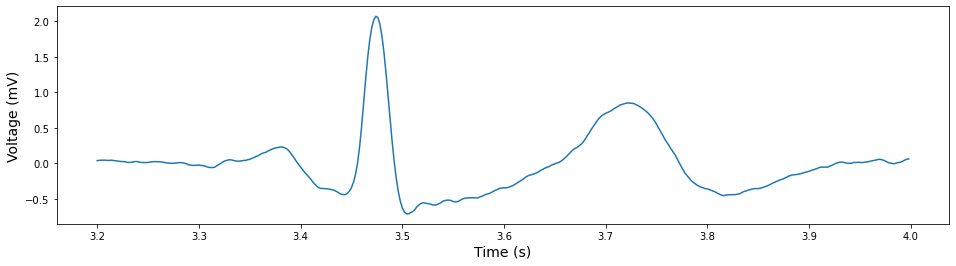

In [22]:
plt.figure(figsize=fig_size)
plt.plot(time_samples[ind_ini:ind_end],ecg_filtered[ind_ini:ind_end])
plt.ylabel('Voltage (mV)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)

## Sampling

In [23]:
fs = 500.
ecg_full = scipy.io.loadmat('ecg/ecg.mat')['ecg'][0:4096,0]
ecg = 5 * ecg_full[48:(-48)]
n_aux = len(ecg)

In [24]:
ft_aux = np.fft.fft(ecg)

In [25]:
upsamp_factor = 10
n = upsamp_factor * n_aux
ft = np.concatenate((ft_aux[:int(n_aux/2)],np.zeros(n-n_aux)))
ft = np.concatenate((ft,ft_aux[int(n_aux/2):]))
signal = np.fft.ifft(ft) * upsamp_factor
f_step = 1 / (n / fs / upsamp_factor)
f_inds = f_step * np.arange(-(n/2-1),n/2+1)

In [26]:
time_samples = np.arange(n)/fs / upsamp_factor
samp_rates = [4,6.4]

ind_ini = 1696 * upsamp_factor
ind_end = 1880 * upsamp_factor

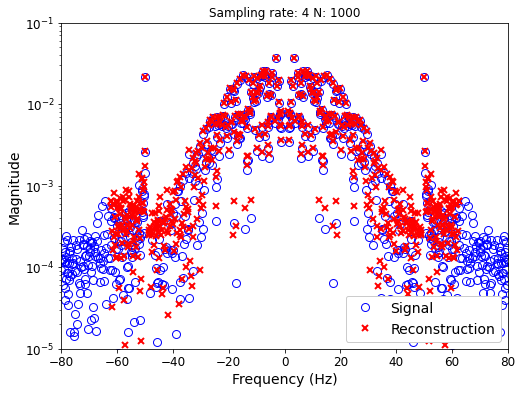

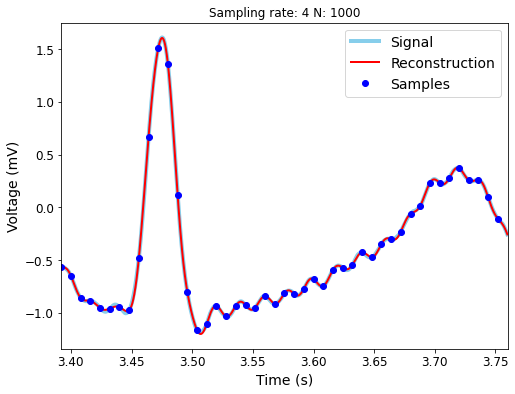

Sampling rate: 4
N: 1000


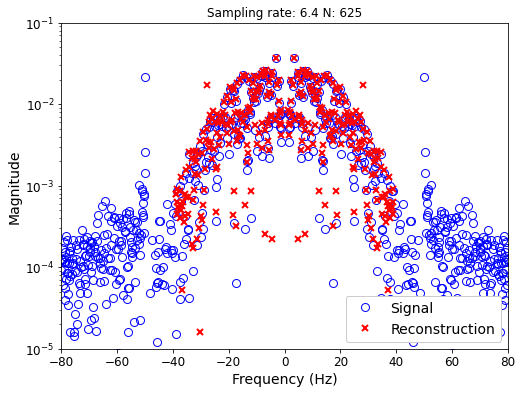

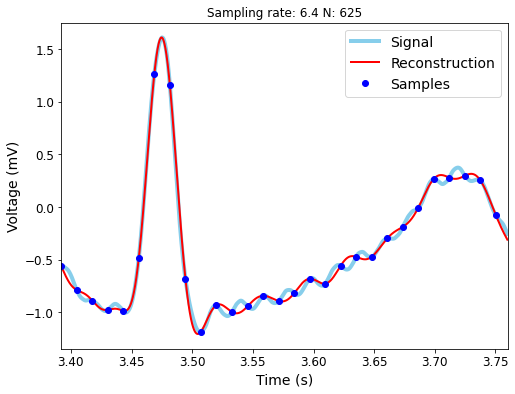

Sampling rate: 6.4
N: 625


In [27]:
for ind,sampling_rate in enumerate(samp_rates):
    undersamp_factor = int(sampling_rate * upsamp_factor)
    ecg_undersamp = signal[::undersamp_factor]
    
    ecg_undersamp_fft = np.fft.fft(ecg_undersamp)
    n_undersamp = len(ecg_undersamp_fft)
    ecg_upsamp_fft = np.concatenate((ecg_undersamp_fft[:int(n_undersamp/2)],np.zeros(n-n_undersamp)))
    ecg_upsamp_fft = np.concatenate((ecg_upsamp_fft,ecg_undersamp_fft[int(n_undersamp/2):]))
    ecg_upsamp = np.fft.ifft(ecg_upsamp_fft)*undersamp_factor
    
    plt.figure(figsize = (8,6))
    # markerline, stemlines, baseline = plt.stem(f_inds,np.abs(spectrum),markerfmt='None')
    plt.plot(f_inds,np.fft.fftshift(ft)/n* upsamp_factor,'o',color='blue',ms=8, markerfacecolor="None",
         markeredgecolor='blue', markeredgewidth=1, label='Signal')
    plt.plot(f_inds,np.fft.fftshift(ecg_upsamp_fft)/n_undersamp,'x',
             color='red',ms=6, markeredgewidth=2,label='Reconstruction')
    plt.yscale('log')
    # plt.setp(baseline, color='k')
    plt.xlim((-80,80))
    plt.ylim((1e-5,1e-1))
    plt.tick_params(labelsize=12)
    plt.ylabel('Magnitude',fontsize=14)
    plt.xlabel('Frequency (Hz)',fontsize=14)
    plt.legend(loc = 'lower right',fontsize=14, framealpha=1)
    plt.title('Sampling rate: ' + str(sampling_rate) + ' N: ' + str(n_undersamp))
    plt.show()
    
    plt.figure(figsize = (8,6))
    time_ind = time_samples[ind_ini:ind_end]
    ecg_plot = signal[ind_ini:ind_end]
    plt.xlim((time_samples[ind_ini],time_samples[ind_end]))
    plt.plot(time_ind,ecg_plot,color='skyblue',linewidth=4,label='Signal')
    plt.plot(time_ind,ecg_upsamp[ind_ini:ind_end],lw=2,color='red',label='Reconstruction')
    plt.plot(time_ind[::undersamp_factor],ecg_plot[::undersamp_factor],'o',color='blue',label='Samples')
    plt.legend(fontsize=14,)
    plt.tick_params(labelsize=12)
    plt.ylabel('Voltage (mV)',fontsize=14)
    plt.xlabel('Time (s)',fontsize=14)
    plt.title('Sampling rate: ' + str(sampling_rate) + ' N: ' + str(n_undersamp))
    plt.show()
    
    
    print('Sampling rate: ' + str(sampling_rate))
    print('N: ' + str(n_undersamp))